In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
from bs4 import BeautifulSoup
from utils import *

import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')
from matplotlib import colors as mcolors, path

### Model building

,Model Number,Policy Beta,pvalue,r-squared
0,0.0,0.013861,0.253709,0.011935
1,1.0,0.019457,0.089455,0.147389
2,2.0,0.019618,0.024245,0.539959
3,3.0,0.023813,0.005875,0.573964
4,4.0,0.025287,0.002933,0.604330


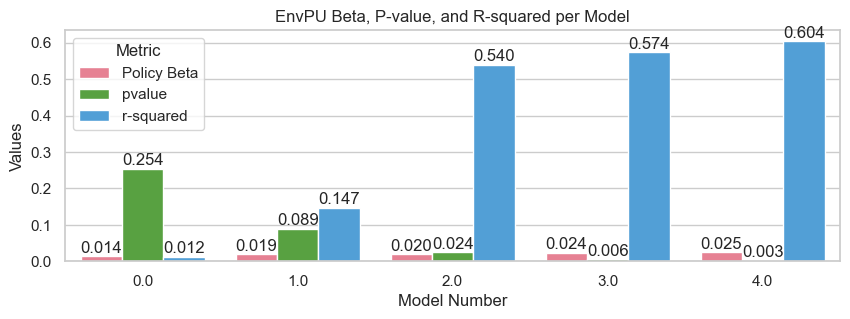

In [2]:
data_escore = pd.read_csv("data_fix/New_Master.csv")
data_escore = add_time(data_escore)
snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities', 'SP500']

linear_factors = ["Mkt_RF", "HML", "EPU", "MOM", "LIQ", 
                  "CPI_SA", "SMB", "NBDI"]
envPU = "EnvPU"
cpu = "CPU"

models = {0: None, 1: ["EPU"], 2:["EPU", "Mkt_RF", "HML", "SMB"], 3:["EPU", "Mkt_RF", "HML", "SMB", "MOM", "LIQ"],
 4:["EPU", "Mkt_RF", "HML", "SMB", "MOM", "LIQ", "CPI_SA", "NBDI"]}

reg_res = pd.DataFrame()
policy = envPU
for mdx in range(5):
       if mdx > 0:
              additional_model = "+".join(models[mdx])
              mod = smf.ols(formula=f'SP500 ~ {policy} + {additional_model}',
                     data=data_escore)
       else: 
              mod = smf.ols(formula=f'SP500 ~ {policy}',
                     data=data_escore)
       res = mod.fit()
       reg_res.loc[mdx, "Model Number"] = int(mdx)
       reg_res.loc[mdx, "Policy Beta"] = res.params.loc[policy]
       reg_res.loc[mdx, "pvalue"] = res.pvalues.loc[policy]
       reg_res.loc[mdx, "r-squared"] = res.rsquared
display(reg_res)
reg_res.to_csv(f"plots/{policy}_normal_model_build.csv", index = False)
# Convert the DataFrame to long format
df_long = pd.melt(reg_res, id_vars='Model Number', var_name='Metric', value_name='Value')

# Set the style of the plot
sns.set(style='whitegrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the bars
sns.barplot(x='Model Number', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

# Add labels and title
ax.set_xlabel('Model Number')
ax.set_ylabel('Values')
ax.set_title(f'{policy} Beta, P-value, and R-squared per Model')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center")
# Show the plot
plt.savefig(f"plots/modelbuild_{policy}.jpg",dpi=300, bbox_inches='tight')
plt.show()

### Full Model Regression, with CPU and EnvPU

The policy for regression is:  EnvPU


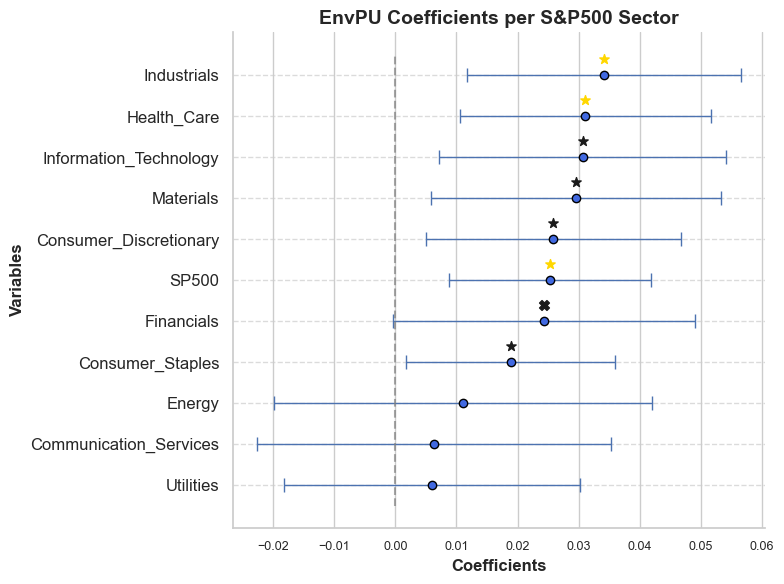

,Variables,Coefficient,P-value,Coefficient STD
2,Industrials,0.034121,0.002901,0.011179
5,Health_Care,0.031093,0.003019,0.010230
7,Information_Technology,0.030612,0.010325,0.011712
1,Materials,0.029529,0.014176,0.011830
3,Consumer_Discretionary,0.025857,0.015123,0.010462
10,SP500,0.025287,0.002933,0.008294
6,Financials,0.024316,0.052154,0.012374
4,Consumer_Staples,0.018841,0.029925,0.008555
0,Energy,0.011066,0.476239,0.015476
8,Communication_Services,0.006343,0.662501,0.014489


""


success


0

In [3]:
regression(data_escore, policy=envPU, market_values=snp_sectors, confounders = True, which = linear_factors,
           regplots = False, descriptive_plots=False, model_results=False, coeff_plot = 
           True, pearson = False)

The policy for regression is:  CPU


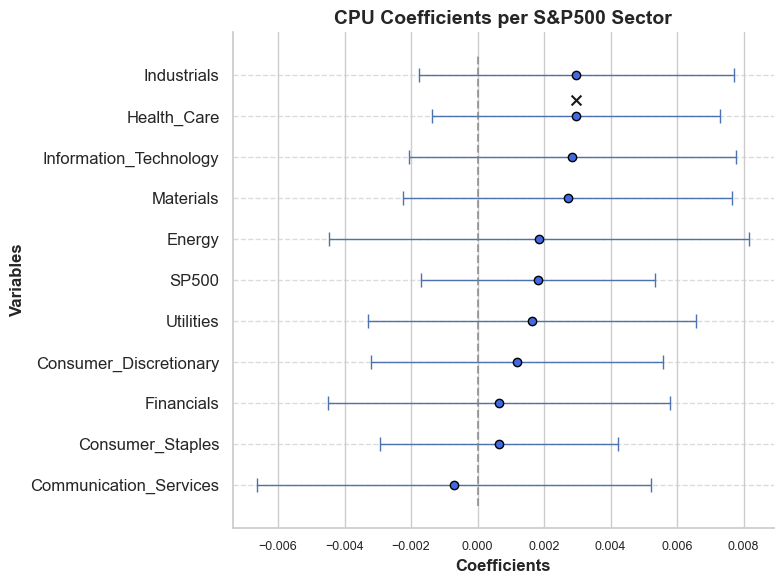

,Variables,Coefficient,P-value,Coefficient STD
2,Industrials,0.002967,0.212486,0.002365
5,Health_Care,0.002960,0.173633,0.002160
7,Information_Technology,0.002853,0.247421,0.002452
1,Materials,0.002709,0.275756,0.002472
0,Energy,0.001853,0.558929,0.003160
10,SP500,0.001809,0.306170,0.001759
9,Utilities,0.001634,0.509034,0.002466
3,Consumer_Discretionary,0.001172,0.594487,0.002195
6,Financials,0.000645,0.802337,0.002571
4,Consumer_Staples,0.000641,0.720179,0.001786


""


success


0

In [4]:
regression(data_escore, policy=cpu, market_values=snp_sectors, confounders = True, which = linear_factors,
           regplots = False, descriptive_plots=False, model_results=False, coeff_plot = 
           True, pearson = False)

### Full Model Regression, with EnvPU, on Data Ratios of top 30 companies on the bottom 30 companies per sector ranked based on external category.

Category is: Cap
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Debt
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Eintensity
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Elevel
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Escore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Pillarscore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Category,Policy Beta,pvalue,r-squared
0,Cap,-0.004148,0.493431,0.091314
1,Debt,0.005520,0.164649,0.039470
2,Eintensity,0.000072,0.983627,0.067200
3,Elevel,-0.008133,0.157409,0.159523
4,Escore,0.004926,0.388776,0.131600
5,Pillarscore,0.000959,0.590714,0.078580


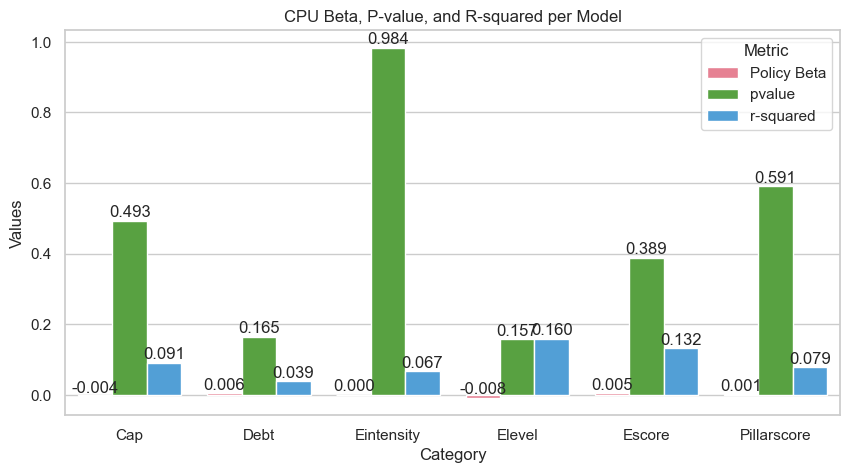

In [5]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']

policy = cpu
reg_res = pd.DataFrame()
for cdx, category in enumerate(close_categories):
    print("Category is:", category)
    closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
    closeX = closeX.iloc[:112,:].copy()
    #closeX.iloc[1:, 1:] = french_xl(closeX.iloc[1:, 1:])
    data_ratios, _ = generate_ratios(closeX, many_return=2, many_category=drop_requirements[category],
                                      rm_name = category, version=2)

    data_ratios = add_time(data_ratios, Xformat= True)
    data_ratios = add_cols(data_ratios, data_escore, cols = ["time", envPU, cpu] + linear_factors)

    #regression(data_ratios, policy=envPU, market_values=snp_sectors, confounders = True, which = linear_factors,
    #        regplots = False, descriptive_plots=False, model_results=False, 
    #        coeff_plot = True, pearson = False)
    data_ratios["SP500"] = data_ratios[snp_sectors].apply(lambda row: row.mean(), axis = 1)

    additional_model = "+".join(models[mdx])
    mod = smf.ols(formula=f'SP500 ~ {policy} + {additional_model}',
                    data=data_ratios)

    res = mod.fit()
    reg_res.loc[cdx, "Category"] = category
    reg_res.loc[cdx, "Policy Beta"] = res.params.loc[policy]
    reg_res.loc[cdx, "pvalue"] = res.pvalues.loc[policy]
    reg_res.loc[cdx, "r-squared"] = res.rsquared


display(reg_res)
reg_res.to_csv(f"{policy}_ratio_regression.csv", index = False)

# Convert the DataFrame to long format
df_long = pd.melt(reg_res, id_vars='Category', var_name='Metric', value_name='Value')

# Set the style of the plot
sns.set(style='whitegrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
sns.barplot(x='Category', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Values')
ax.set_title(f'{policy} Beta, P-value, and R-squared per Model')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center")
# Show the plot
plt.show()


### Top bottom regression

Category is: Cap
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.002476,0.439344,0.456438
1,Energy_bottom,0.001844,0.619410,0.480039
2,Materials_top,0.002736,0.285932,0.437155
3,Materials_bottom,0.003145,0.222575,0.511332
4,Industrials_top,0.003191,0.190673,0.501473
5,Industrials_bottom,0.003199,0.194717,0.491733
6,Consumer_Discretionary_top,0.003288,0.198945,0.385662
7,Consumer_Discretionary_bottom,0.003070,0.238701,0.398002
8,Consumer_Staples_top,0.002324,0.227079,0.347040
9,Consumer_Staples_bottom,0.000338,0.847211,0.356711


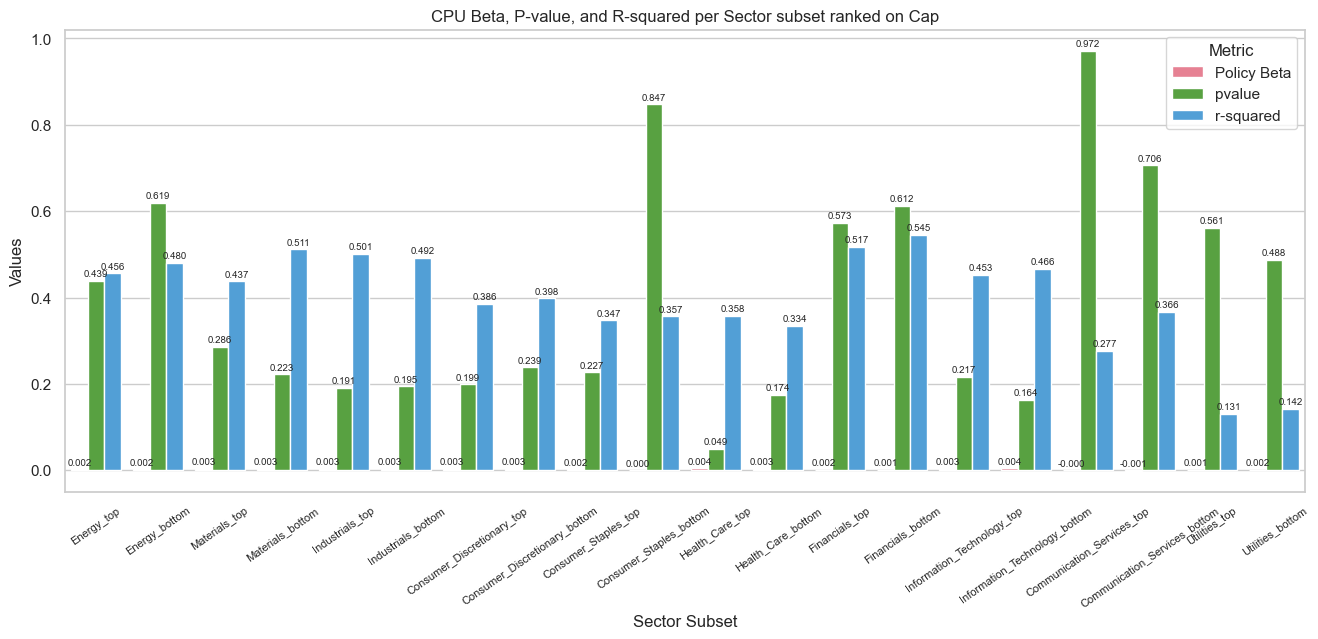

Category is: Debt
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.003324,0.518511,0.411640
1,Energy_bottom,0.003031,0.474694,0.451384
2,Materials_top,0.002731,0.477457,0.486454
3,Materials_bottom,0.002872,0.304978,0.527534
4,Industrials_top,0.003192,0.288475,0.461842
5,Industrials_bottom,0.002760,0.288236,0.493924
6,Consumer_Discretionary_top,0.001491,0.687933,0.389897
7,Consumer_Discretionary_bottom,0.002303,0.388094,0.416875
8,Consumer_Staples_top,-0.001041,0.646593,0.307957
9,Consumer_Staples_bottom,-0.000309,0.863955,0.322777


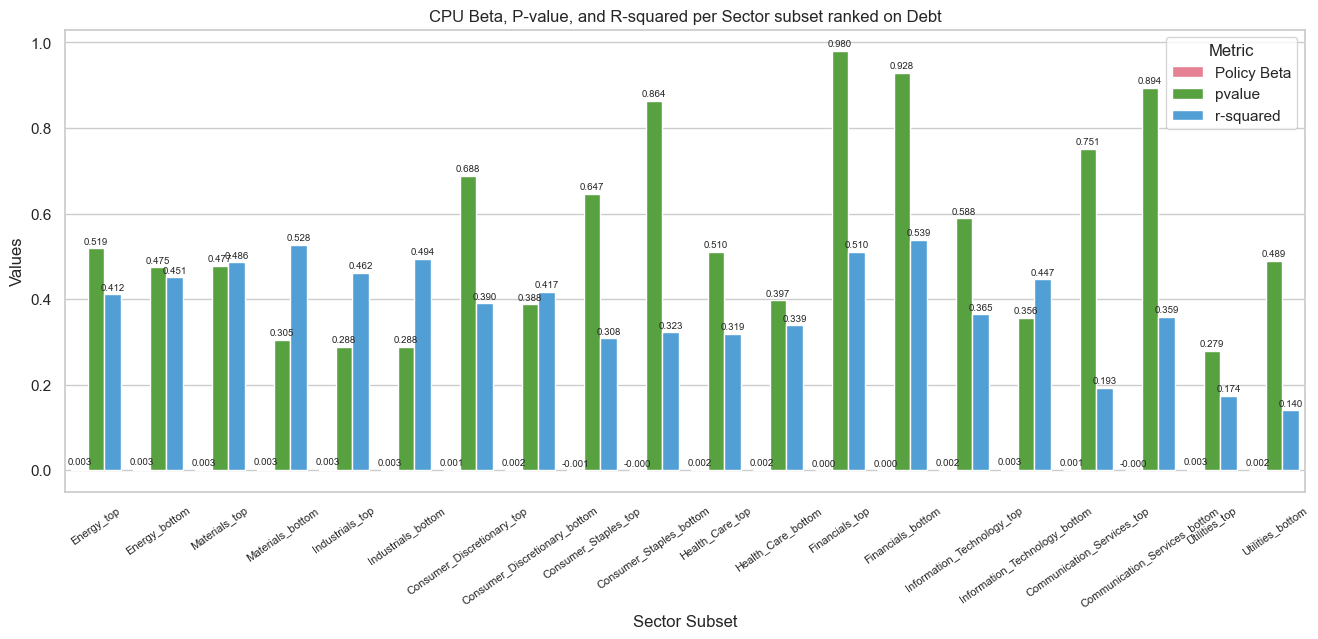

Category is: Eintensity
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.004398,0.341881,0.419636
1,Energy_bottom,0.002397,0.557880,0.455799
2,Materials_top,0.001917,0.533861,0.369418
3,Materials_bottom,0.002787,0.334063,0.489208
4,Industrials_top,0.003462,0.312628,0.372676
5,Industrials_bottom,0.003010,0.309711,0.462988
6,Consumer_Discretionary_top,0.000459,0.907377,0.261158
7,Consumer_Discretionary_bottom,0.001854,0.552594,0.392389
8,Consumer_Staples_top,-0.002079,0.315543,0.278072
9,Consumer_Staples_bottom,-0.001820,0.335306,0.318874


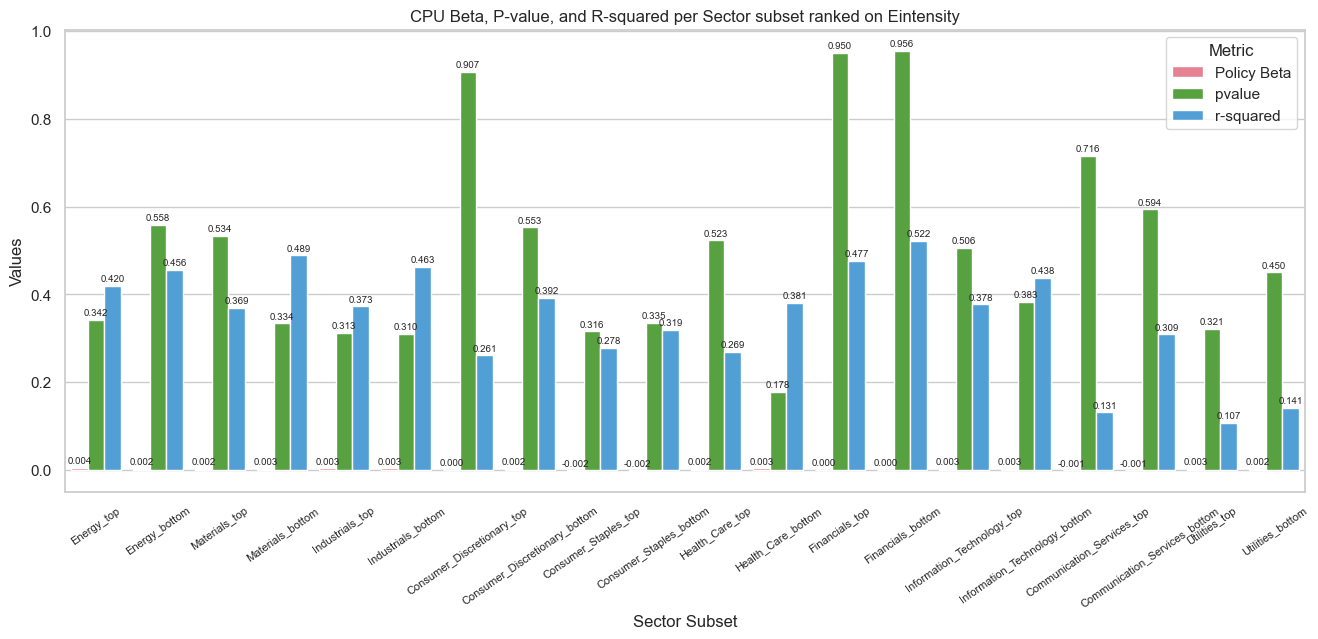

Category is: Elevel
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.003900,0.234369,0.417480
1,Energy_bottom,0.002703,0.503971,0.468034
2,Materials_top,0.004397,0.204754,0.526119
3,Materials_bottom,0.002770,0.314652,0.504480
4,Industrials_top,0.003819,0.236010,0.412153
5,Industrials_bottom,0.003825,0.168457,0.465841
6,Consumer_Discretionary_top,0.002203,0.545292,0.347638
7,Consumer_Discretionary_bottom,0.001562,0.610174,0.396792
8,Consumer_Staples_top,-0.000564,0.766877,0.347956
9,Consumer_Staples_bottom,-0.000932,0.617869,0.342169


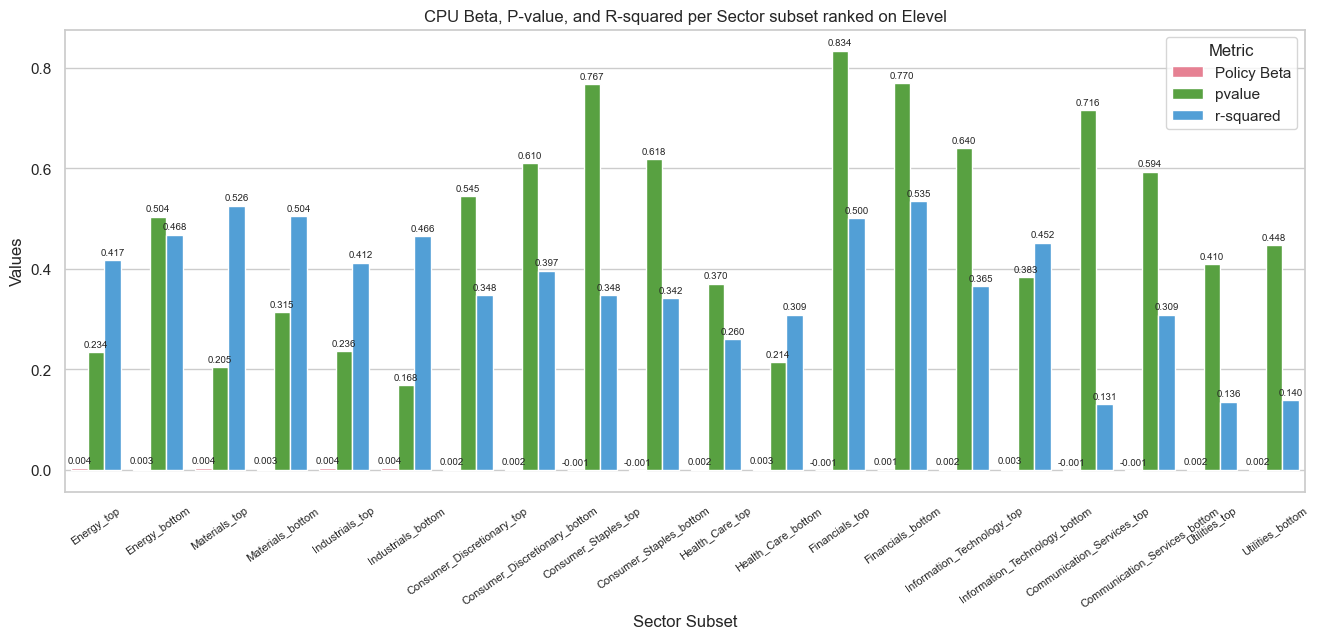

Category is: Escore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.004052,0.282233,0.457470
1,Energy_bottom,0.002199,0.573997,0.470078
2,Materials_top,0.004204,0.139199,0.516546
3,Materials_bottom,0.002266,0.380139,0.517926
4,Industrials_top,0.003161,0.266448,0.450374
5,Industrials_bottom,0.002961,0.240385,0.504865
6,Consumer_Discretionary_top,0.001915,0.470922,0.437441
7,Consumer_Discretionary_bottom,0.002424,0.340401,0.423256
8,Consumer_Staples_top,0.000906,0.637292,0.322871
9,Consumer_Staples_bottom,-0.000452,0.792091,0.361101


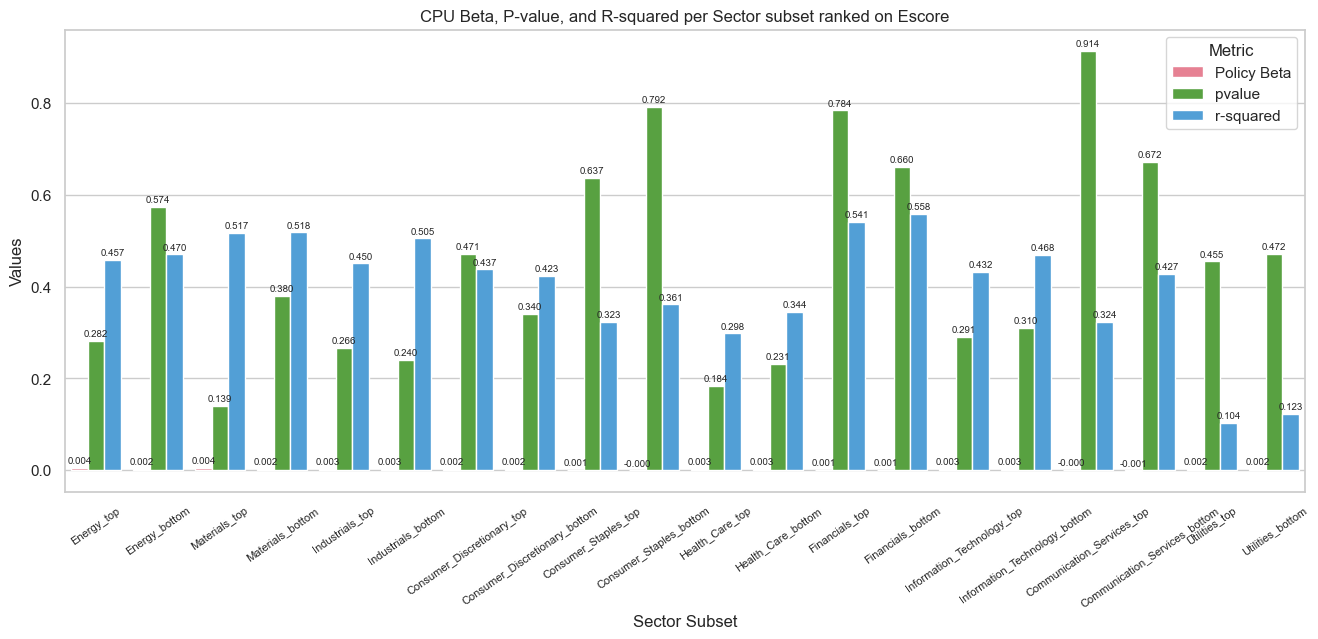

Category is: Pillarscore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Sector,Policy Beta,pvalue,r-squared
0,Energy_top,0.004524,0.218757,0.473601
1,Energy_bottom,0.001803,0.637567,0.481473
2,Materials_top,0.002688,0.286661,0.516530
3,Materials_bottom,0.002477,0.336327,0.522680
4,Industrials_top,0.003729,0.165693,0.481039
5,Industrials_bottom,0.002900,0.256122,0.504642
6,Consumer_Discretionary_top,0.002946,0.274487,0.415302
7,Consumer_Discretionary_bottom,0.002170,0.394225,0.431951
8,Consumer_Staples_top,0.000083,0.966591,0.347453
9,Consumer_Staples_bottom,-0.000525,0.762567,0.361214


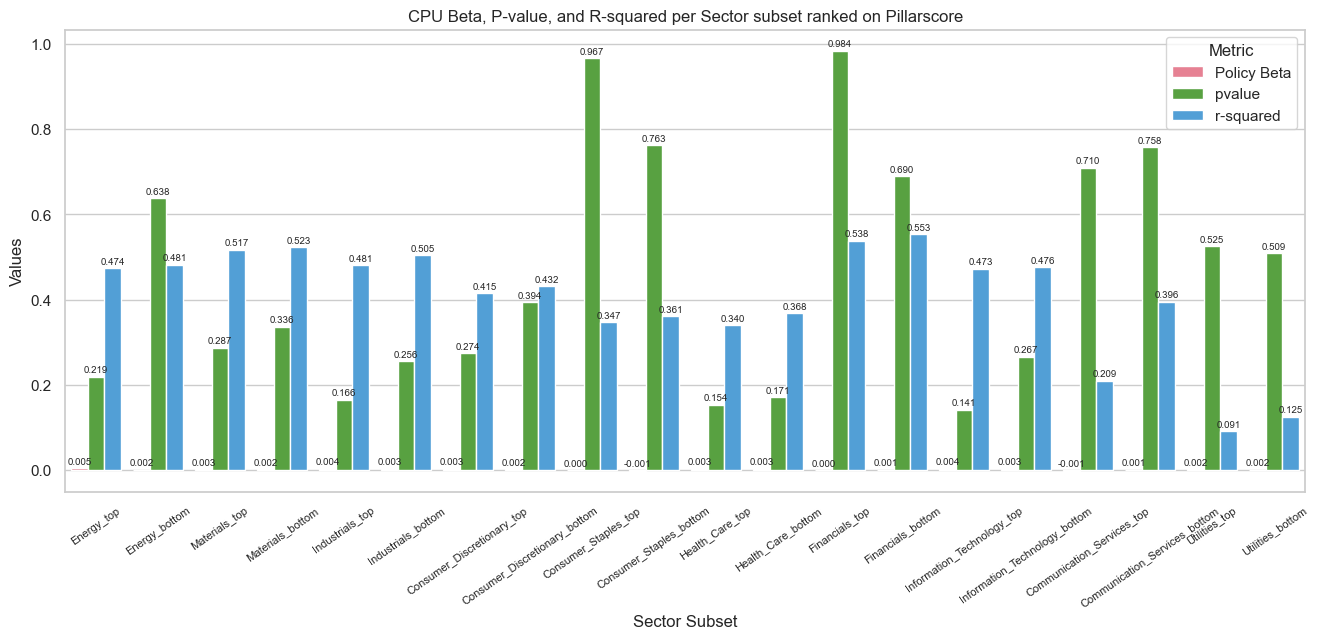

In [6]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']

policy = cpu
for cdx, category in enumerate(close_categories):
       reg_res = pd.DataFrame()
       print("Category is:", category)
       closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
       closeX = closeX.iloc[:112,:].copy()
       #closeX.iloc[1:, 1:] = french_xl(closeX.iloc[1:, 1:])
       data_ratios, dr_mean = generate_ratios(closeX, many_return=2, many_category=drop_requirements[category],
                                               rm_name = category, version=2)

       dr_mean = add_time(dr_mean, Xformat= True)
       dr_mean = add_cols(dr_mean, data_escore, cols = ["time", envPU, cpu] + linear_factors)
       #columns of interest
       coi = [col for col in dr_mean.columns if any(sector in col for sector in snp_sectors)]
       for ccdx, c in enumerate(coi): 
              additional_model = "+".join(linear_factors)
              mod = smf.ols(formula=f'{c} ~ {policy} + {additional_model}',
                     data=dr_mean)
              res = mod.fit()
              reg_res.loc[ccdx, "Sector"] = c
              reg_res.loc[ccdx, "Policy Beta"] = res.params.loc[policy]
              reg_res.loc[ccdx, "pvalue"] = res.pvalues.loc[policy]
              reg_res.loc[ccdx, "r-squared"] = res.rsquared
       display(reg_res)
       reg_res.to_csv(f"{policy}_{category}_sector_top_bottom_regression.jpg.csv", index = False)
       # Convert the DataFrame to long format
       df_long = pd.melt(reg_res, id_vars='Sector', var_name='Metric', value_name='Value')

       # Set the style of the plot
       sns.set(style='whitegrid')

       # Set up the figure and axes
       fig, ax = plt.subplots(figsize=(16, 6))

       # Plot the bars
       sns.barplot(x='Sector', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

       # Add labels and title
       ax.set_xlabel('Sector Subset')
       ax.set_ylabel('Values')
       ax.set_title(f'{policy} Beta, P-value, and R-squared per Sector subset ranked on {category}')
       ax.set_xticklabels(ax.get_xticklabels(), rotation=35, fontsize=8)
       for p in ax.patches:
              height = p.get_height()
              ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center", fontsize = 7)
       # Show the plot
       plt.savefig(f'plots/{policy}_{category}_sector_top_bottom_regression.jpg', dpi=300, bbox_inches='tight')
       plt.show()


### Top Down Horizontal

In [45]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']

policy = envPU
reg_res = pd.DataFrame()
for cdx, category in enumerate(close_categories):
       print("Category is:", category)
       closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
       closeX = closeX.iloc[:112,:].copy()
       #closeX.iloc[1:, 1:] = french_xl(closeX.iloc[1:, 1:])
       data_ratios, dr_mean = generate_ratios(closeX, many_return=2, many_category=drop_requirements[category],
                                               rm_name = category, version=2)

       dr_mean = add_time(dr_mean, Xformat= True)
       dr_mean = add_cols(dr_mean, data_escore, cols = ["time", envPU, cpu] + linear_factors)
       #columns of interest
       coi = [col for col in dr_mean.columns if any(sector in col for sector in snp_sectors)]
       for ccdx, c in enumerate(coi): 
              additional_model = "+".join(linear_factors)
              mod = smf.ols(formula=f'{c} ~ {policy} + {additional_model}',
                     data=dr_mean)
              res = mod.fit()
              reg_res.loc[ccdx, f"{category}_Sector"] = c
              reg_res.loc[ccdx, f"{category}_Policy_Beta"] = res.params.loc[policy]
              reg_res.loc[ccdx, f"{category}_pvalue"] = res.pvalues.loc[policy]
display(reg_res)
reg_res.to_csv(f"plots/top_bottomSTARS_{policy}_DATA.csv")

Category is: Cap
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Debt
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Eintensity
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Elevel
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Escore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios
Category is: Pillarscore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:
Sector ranking and ratios


,Cap_Sector,Cap_Policy_Beta,Cap_pvalue,Debt_Sector,Debt_Policy_Beta,Debt_pvalue,Eintensity_Sector,Eintensity_Policy_Beta,Eintensity_pvalue,Elevel_Sector,Elevel_Policy_Beta,Elevel_pvalue,Escore_Sector,Escore_Policy_Beta,Escore_pvalue,Pillarscore_Sector,Pillarscore_Policy_Beta,Pillarscore_pvalue
0,Energy_top,0.017924,0.252703,Energy_top,0.012326,0.625441,Energy_top,0.012852,0.571507,Energy_top,0.020955,0.192095,Energy_top,0.022220,0.228685,Energy_top,0.025881,0.150622
1,Energy_bottom,0.018280,0.314318,Energy_bottom,0.012817,0.537663,Energy_bottom,0.011827,0.555276,Energy_bottom,0.018632,0.346885,Energy_bottom,0.013749,0.473118,Energy_bottom,0.017679,0.345165
2,Materials_top,0.028373,0.022573,Materials_top,0.022121,0.239410,Materials_top,0.016942,0.260983,Materials_top,0.037510,0.026085,Materials_top,0.030086,0.029812,Materials_top,0.021921,0.074794
3,Materials_bottom,0.026937,0.031742,Materials_bottom,0.029494,0.030144,Materials_bottom,0.025091,0.074405,Materials_bottom,0.027118,0.042997,Materials_bottom,0.026784,0.032681,Materials_bottom,0.030317,0.015067
4,Industrials_top,0.033938,0.003904,Industrials_top,0.034702,0.017275,Industrials_top,0.044160,0.007644,Industrials_top,0.046984,0.002433,Industrials_top,0.040932,0.002769,Industrials_top,0.036906,0.004487
5,Industrials_bottom,0.037234,0.001681,Industrials_bottom,0.035335,0.004795,Industrials_bottom,0.041686,0.003456,Industrials_bottom,0.038635,0.003943,Industrials_bottom,0.036718,0.002463,Industrials_bottom,0.036651,0.002852
6,Consumer_Discretionary_top,0.021884,0.080113,Consumer_Discretionary_top,0.031718,0.079161,Consumer_Discretionary_top,0.052380,0.005799,Consumer_Discretionary_top,0.036685,0.038007,Consumer_Discretionary_top,0.028357,0.027749,Consumer_Discretionary_top,0.032258,0.013491
7,Consumer_Discretionary_bottom,0.032277,0.010474,Consumer_Discretionary_bottom,0.034052,0.008213,Consumer_Discretionary_bottom,0.034669,0.021848,Consumer_Discretionary_bottom,0.034463,0.020092,Consumer_Discretionary_bottom,0.029344,0.017207,Consumer_Discretionary_bottom,0.028428,0.021280
8,Consumer_Staples_top,0.021990,0.018524,Consumer_Staples_top,0.019387,0.079295,Consumer_Staples_top,0.011116,0.273459,Consumer_Staples_top,0.014806,0.110095,Consumer_Staples_top,0.022439,0.015738,Consumer_Staples_top,0.021978,0.021171
9,Consumer_Staples_bottom,0.019697,0.020300,Consumer_Staples_bottom,0.017158,0.050056,Consumer_Staples_bottom,0.018253,0.047058,Consumer_Staples_bottom,0.017647,0.051853,Consumer_Staples_bottom,0.021357,0.009871,Consumer_Staples_bottom,0.018887,0.024781


In [62]:
list(mcolors.to_rgba("steelblue"))[:3] + [1]#.insert(2, 1)

[0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 1]

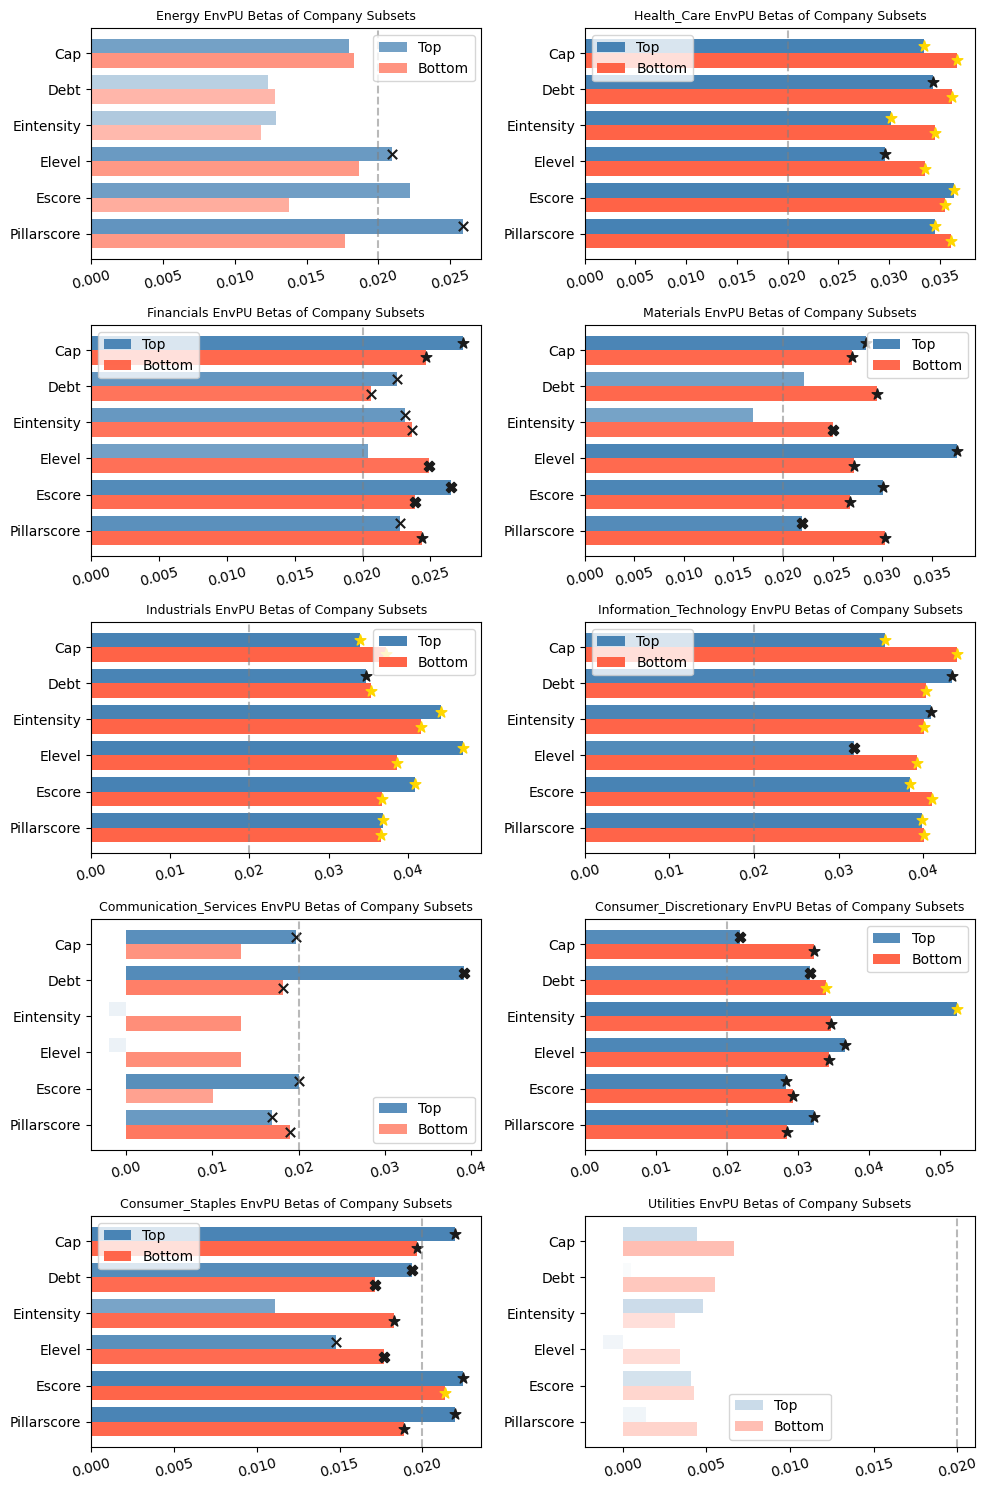

In [53]:
hor_res = reg_res.T.copy()
hor_res.columns = reg_res.T.iloc[0, :].values.tolist()
#drop string rows in hor res 
hor_res.drop_duplicates(inplace=True)
hor_res = hor_res.iloc[1:, :]
#SHOW CATEGORY AVERAGE FOR EACH RANKING, time series plot of dynamic average
sns.reset_orig()
fig, ax = plt.subplots(5, 2, figsize = (10, 15))
for sdx, sector in enumerate(snp_sectors): 
    ax[sdx%5, sdx%2].set_title(f"{sector} {policy} Betas of Company Subsets", fontsize = 9)
    sector_results = hor_res.filter(like=sector)
    p_values = sector_results.iloc[1::2]
    color_top = p_values[f"{sector}_top"].apply(lambda pvl: tuple(list(mcolors.to_rgba("steelblue"))[:3] + [1-pvl])).values.tolist()
    color_bottom = p_values[f"{sector}_bottom"].apply(lambda pvl: tuple(list(mcolors.to_rgba("tomato"))[:3] + [1-pvl])).values.tolist()
    policy_betas = sector_results.iloc[::2]
    ax[sdx%5, sdx%2].barh(y=np.array(range(len(close_categories)))-0.2, width=policy_betas[f"{sector}_top"],
             height=0.4, label = "Top", color = color_top)
    ax[sdx%5, sdx%2].barh(y=np.array(range(len(close_categories)))+0.2, width=policy_betas[f"{sector}_bottom"],
             height=0.4, label = "Bottom", color = color_bottom)
    

    for ct_idx, ct in enumerate(color_top):
        if (ct[3] >= 0.8 and ct[3] < 0.9):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="x", s = 45, color = "k")
        if (ct[3] >= 0.9 and ct[3] < 0.95):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="X", s = 55, color = "k")
        if (ct[3] >= 0.95 and ct[3] < 0.99):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="*", s = 65, color = "k")
        if (ct[3] >= 0.99):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="*", s = 65, color = "gold")
    for cb_idx, cb in enumerate(color_bottom):
        if (cb[3] >= 0.8 and cb[3] < 0.9):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="x", s = 45, color = "k")
        if (cb[3] >= 0.9 and cb[3] < 0.95):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="X", s = 55, color = "k")
        if (cb[3] >= 0.95 and cb[3] < 0.99):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="*", s = 65, color = "k")
        if (cb[3] >= 0.99):
            ax[sdx%5, sdx%2].scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="*", s = 65, color = "gold")
   
    ax[sdx%5, sdx%2].set_yticks(np.array(range(len(close_categories))))
    ax[sdx%5, sdx%2].set_yticklabels(close_categories)
    ax[sdx%5, sdx%2].invert_yaxis()
    for tick in ax[sdx%5, sdx%2].get_xticklabels():
        tick.set_rotation(15)
    ax[sdx%5, sdx%2].axvline(x = 0.02, color = 'gray', ls = "dashed",  alpha = 0.55)
    ax[sdx%5, sdx%2].legend()

plt.tight_layout()
plt.savefig(f"top_bottomSTARS_{policy}_noSHARE.jpg",dpi=300, bbox_inches='tight')
plt.show()

### Per company regression manhattan

In [114]:
def company_regression(category, reg_df, reg_cols, policy, many_return = 2, many_category = 2, 
  confounders = False, which = [""], split_2 = False, manhattan = False, split_significant = False, 
  suggested = 1.5, real_names = False, adaptive = False):

  df = pd.read_csv(f"data_fix/NCloseX{category}.csv")
  df= df.iloc[:112,:].copy()
  df_c = clean_companies(df, many_return=many_return, many_category=many_category)
  company_sector = pd.Series([(df_c.iloc[0, 1:].values.tolist()[i], pd.Series(df_c.columns[1:].
                              values.tolist()).apply(lambda sc: sc.split(".")[0]).values.tolist()[i])
                                for i in range(df_c.shape[1] - 1)]).unique()
  #display(df_c.sample())
  company_sector = {t[0] : t[1] for t in company_sector}
  ds = df_c.iloc[1:, :].copy()
  ds.columns = df_c.iloc[0, :]
  ds.columns = pd.Series(ds.columns).apply(lambda col: "_".join(col.split(".")) if (type(col) == str) else col)

  ds_cat = ds.iloc[:, len(company_sector) + 1:]
  ds_return = ds.iloc[:, 1:len(company_sector)]
  ds = add_time(ds, Xformat=True)
  ds_return["time"] = ds["time"].copy()
  ds_cat["time"] = ds["time"].copy()
  ds_cat = ds_cat.applymap(lambda num: float(num))
  ds_return = add_cols(ds_return, reg_df, reg_cols).applymap(lambda el: float(el))

  #regression
  reg_res = pd.DataFrame()
  for cdx, company in enumerate(ds_return.columns[:len(company_sector)-1]):
    #print(ds_return[policy], ds_return[company])
    if confounders:
      additional_model = "+".join(which)
      mod = smf.ols(formula=f'{company} ~ {policy} + {additional_model}',
                  data=ds_return)
    else:
      mod = smf.ols(formula=f'{company} ~ {policy}',
                  data=ds_return)
    res = mod.fit()
    reg_res.loc[cdx, "Company"] = company
    reg_res.loc[cdx, "beta_coef"] = res.params.loc[policy]
    reg_res.loc[cdx, "pvalue"] = res.pvalues.loc[policy]

  #Descriptive statistics
  print("regressions done")
  reg_res["sector"] = reg_res["Company"].apply(lambda co: company_sector[".".join(co.split("_"))])
  reg_res["position_man"] = reg_res.index.tolist()
  reg_res["pvalue_man"] = -np.log10(reg_res["pvalue"])

  reg_res[f"L2Y Average {category}"] = reg_res["Company"].apply(lambda co:
                      ds_cat.query(f"time > {str(ds_cat.time.max() - 2)}")[co].mean())
  snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']
  snp_dict = {sec : ssdx for ssdx, sec in enumerate(snp_sectors)}
  reg_res["sector_id"] = reg_res["sector"].apply(lambda s: snp_dict[s])
  reg_res["color"] = reg_res["sector_id"].apply(lambda sid: "slateblue" if sid%2 == 0 else "darkslateblue")
  if(manhattan):
    plt.figure(figsize = (8, 5))
    #plt.scatter(reg_res[f"L2Y Average {category}"], reg_res["pvalue_man"], alpha = 0.7, color = "k", marker="o")
    plt.scatter(reg_res["sector_id"] + np.random.normal(0, 0.15, size = len(reg_res["sector_id"])), 
                reg_res["pvalue_man"], alpha = 0.8, color = reg_res["color"], marker="o")
    alpha = 0.05
    bonferroni_logged = -np.log10(alpha/len(reg_res))
    plt.axhline(y = -np.log10(alpha), color = 'slategray', linestyle = "-.", label = r"$\alpha = 0.05$")
    plt.axhline(y = bonferroni_logged, color = 'thistle', linestyle = "--", 
            label = "Bonferroni correction significance")
    plt.legend()
    plt.title(f"Manhattan Plot of Company {policy} Regression P-values")
    plt.ylabel("$-log(p)$")
    plt.xticks(ticks = range(len(snp_sectors)), labels=snp_sectors, rotation = 45, ha="right",va= "top")
    #plt.xscale("log")
    plt.xlabel('Company Sector')#, "ha=right")
    plt.savefig(f"{policy}manhattan_SECTOR.jpg",dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Companies the most impacted by {policy} with suggested significance level of 2 (in -log10):")
    good_companies = reg_res.query("pvalue <= 0.05")
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.kdeplot(good_companies['beta_coef'], color = 'r', legend = True, ax = ax, label = 'After')
    sns.kdeplot(reg_res['beta_coef'], color = 'b', legend = True, ax = ax, label = 'Before')
    ax.set_title("Density distribution of Beta Coefficients before and after significance filtering",
                  fontsize = 10)
    ax.set_xlabel(f"{policy} Beta Coefficients")
    ax.axvline(x = 0, ls = "dashed", color = "black", label = "Null partition")
    ax.legend()
    plt.savefig(f"{policy}density.jpg",dpi=300, bbox_inches='tight')
    print(len(good_companies), len(reg_res))
    plt.show()

  
  if (split_significant):
    print("\n Filtering out non signficiant company regression coefficients")
    reg_res = reg_res.query(f"pvalue_man > {suggested}")
  
  if (split_2):

    #L2Y = Last 2 year
    positive = reg_res[reg_res["beta_coef"] > 0]
    negative = reg_res[reg_res["beta_coef"] <= 0]
    print("\n Positive company count:", len(positive), "|| Negative company count:", len(negative))

    if (not len(negative) and adaptive): 
      print(" Changing negative companies to companies below average coefficient\n")
      coef_average = reg_res["beta_coef"].median()
      positive = reg_res[reg_res["beta_coef"] >= coef_average]
      negative = reg_res[reg_res["beta_coef"] < coef_average]
    sector_count_positive = positive.groupby("sector").count().sort_values(by="Company")
    sector_count_negative = negative.groupby("sector").count().sort_values(by="Company")
    fig, ax = plt.subplots(2,1, figsize = (10, 9))
    ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
    ax[0].set_title(f"Positive Regression Coefficient with {policy}")
    sns.barplot(x = sector_count_positive.index, y = sector_count_positive["Company"].values, ax = ax[0], palette='husl')
    
    ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 45)
    ax[1].set_title(f"Negative Regression Coefficient with {policy}")
    if (len(negative)):
      sns.barplot(x = sector_count_negative.index, y = sector_count_negative["Company"].values, ax = ax[1], palette='husl')
    plt.tight_layout()
    print(f"L2Y Average {category} of positive correlated companies:", positive[f"L2Y Average {category}"].mean())
    print(f"L2Y Average {category} of negative correlated companies:", negative[f"L2Y Average {category}"].mean())
    print("student's t-test results:", ttest_ind(positive[f"L2Y Average {category}"], 
                                                 negative[f"L2Y Average {category}"]))
    plt.show()
    plt.hist(reg_res["beta_coef"])
    plt.show()

  return "success"

dropped companies with consecutive nans
forward fill of nan done
regressions done


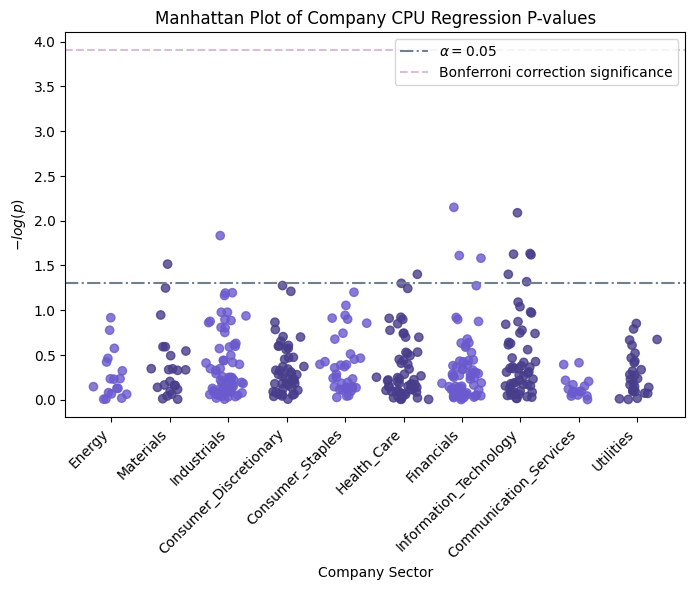

Companies the most impacted by CPU with suggested significance level of 2 (in -log10):
12 408


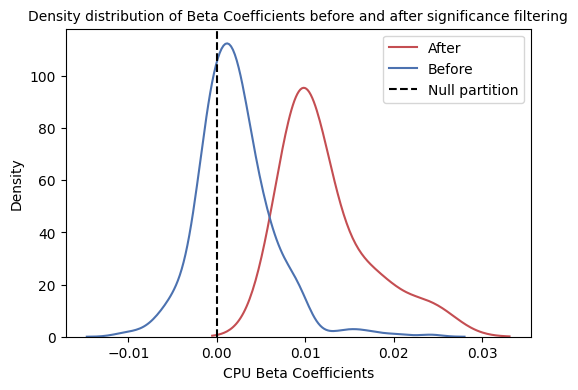

'success'

In [116]:
company_regression("Cap", data_escore, policy=cpu, reg_cols=["time", envPU, cpu] + linear_factors, 
                    confounders = True, which = linear_factors, manhattan=True, split_2=False, 
                    split_significant=False, real_names=False, adaptive=False)

### Per company sector beta descriptions

In [127]:
def company_regression(category, reg_df, reg_cols, policy, many_return = 2, many_category = 2, 
  confounders = False, which = [""], split_2 = False, manhattan = False, split_significant = False, 
  suggested = 1.5, real_names = False, adaptive = False, plotplot = False):

  df = pd.read_csv(f"data_fix/NCloseX{category}.csv")
  df= df.iloc[:112,:].copy()
  df_c = clean_companies(df, many_return=many_return, many_category=many_category)
  company_sector = pd.Series([(df_c.iloc[0, 1:].values.tolist()[i], pd.Series(df_c.columns[1:].
                              values.tolist()).apply(lambda sc: sc.split(".")[0]).values.tolist()[i])
                                for i in range(df_c.shape[1] - 1)]).unique()
  #display(df_c.sample())
  company_sector = {t[0] : t[1] for t in company_sector}
  ds = df_c.iloc[1:, :].copy()
  ds.columns = df_c.iloc[0, :]
  ds.columns = pd.Series(ds.columns).apply(lambda col: "_".join(col.split(".")) if (type(col) == str) else col)

  ds_cat = ds.iloc[:, len(company_sector) + 1:]
  ds_return = ds.iloc[:, 1:len(company_sector)]
  ds = add_time(ds, Xformat=True)
  ds_return["time"] = ds["time"].copy()
  ds_cat["time"] = ds["time"].copy()
  ds_cat = ds_cat.applymap(lambda num: float(num))
  ds_return = add_cols(ds_return, reg_df, reg_cols).applymap(lambda el: float(el))

  #regression
  reg_res = pd.DataFrame()
  for cdx, company in enumerate(ds_return.columns[:len(company_sector)-1]):
    #print(ds_return[policy], ds_return[company])
    if confounders:
      additional_model = "+".join(which)
      mod = smf.ols(formula=f'{company} ~ {policy} + {additional_model}',
                  data=ds_return)
    else:
      mod = smf.ols(formula=f'{company} ~ {policy}',
                  data=ds_return)
    res = mod.fit()
    reg_res.loc[cdx, "Company"] = company
    reg_res.loc[cdx, "beta_coef"] = res.params.loc[policy]
    reg_res.loc[cdx, "pvalue"] = res.pvalues.loc[policy]

  #Descriptive statistics
  print("regressions done")
  reg_res["sector"] = reg_res["Company"].apply(lambda co: company_sector[".".join(co.split("_"))])
  reg_res["position_man"] = np.random.uniform(size=len(reg_res), low=0, high=2)
  reg_res["pvalue_man"] = -np.log10(reg_res["pvalue"])

  reg_res[f"L2Y Average {category}"] = reg_res["Company"].apply(lambda co:
                      ds_cat.query(f"time > {str(ds_cat.time.max() - 2)}")[co].mean())
  
  if (split_significant):
    print("\n Filtering out non signficiant company regression coefficients")
    reg_res = reg_res.query(f"pvalue <= 0.05")
  
  if (split_2):

    #L2Y = Last 2 year
    positive = reg_res[reg_res["beta_coef"] > 0]
    negative = reg_res[reg_res["beta_coef"] <= 0]
    print("\n Positive company count:", len(positive), "|| Negative company count:", len(negative))

    if (not len(negative) and adaptive): 
      print(" Changing negative companies to companies below average coefficient\n")
      coef_average = reg_res["beta_coef"].median()
      positive = reg_res[reg_res["beta_coef"] >= coef_average]
      negative = reg_res[reg_res["beta_coef"] < coef_average]
    sector_count = reg_res.groupby("sector").count()
    sector_count_positive = (positive.groupby("sector").count() / sector_count).sort_values(by="Company")
    sector_count_negative = (negative.groupby("sector").count() / sector_count).sort_values(by="Company")
    if (plotplot):
      fig, ax = plt.subplots(2,1, figsize = (10, 9), sharey = True)
      ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
      ax[0].set_title(f"Company % with a positive regression coefficient with {policy} per sector")
      sns.barplot(x = sector_count_positive.index, y = sector_count_positive["Company"].values, ax = ax[0], palette='husl')
      
      ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 45)
      ax[1].set_title(f"Company % with a negative regression coefficient with {policy} per sector")
      if (len(negative)):
        sns.barplot(x = sector_count_negative.index, y = sector_count_negative["Company"].values, ax = ax[1], palette='husl')
      plt.tight_layout()
      plt.savefig("company_count.jpg", dpi=300, bbox_inches='tight')
      plt.show()
    print(f"L2Y Average {category} of positive correlated companies with {policy}:", positive[f"L2Y Average {category}"].mean())
    print(f"L2Y Average {category} of negative correlated companies with {policy}:", negative[f"L2Y Average {category}"].mean())
    print("student's t-test results:", ttest_ind(positive[f"L2Y Average {category}"], 
                                                 negative[f"L2Y Average {category}"]))
    return (positive[f"L2Y Average {category}"].mean(), negative[f"L2Y Average {category}"].mean(),
            ttest_ind(positive[f"L2Y Average {category}"], negative[f"L2Y Average {category}"])[1])
    
  return "success"

dropped companies with consecutive nans
forward fill of nan done
regressions done

 Positive company count: 278 || Negative company count: 130


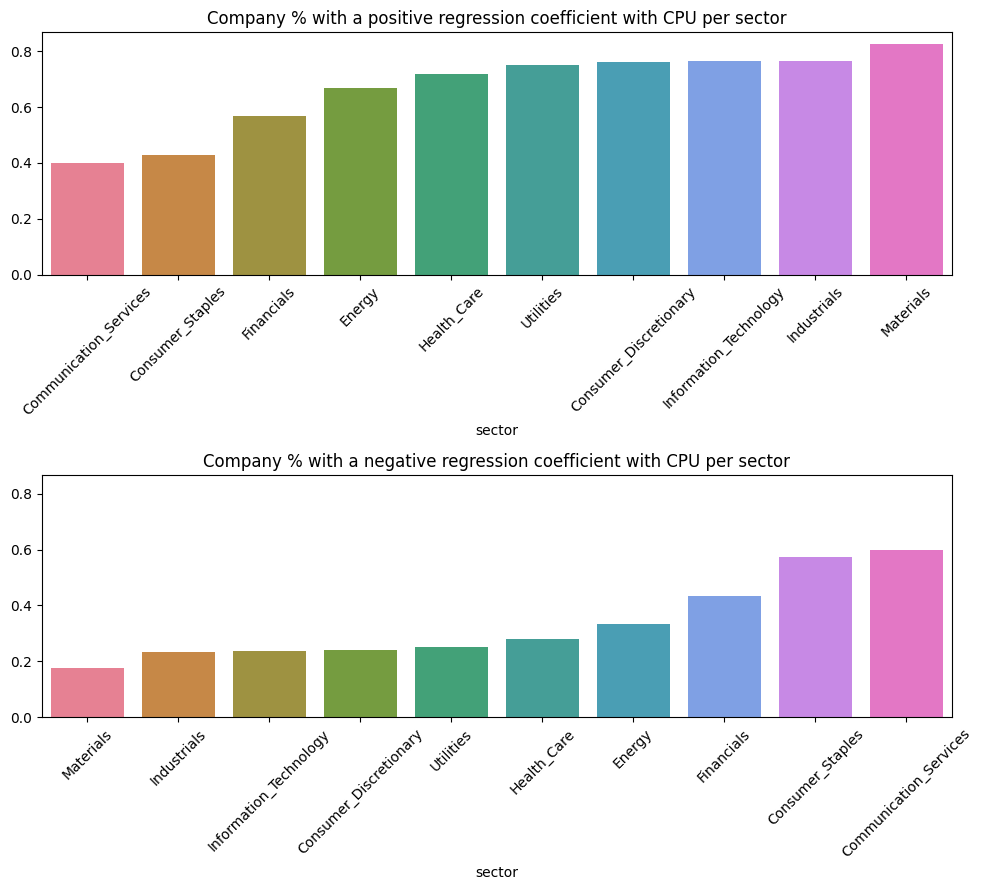

L2Y Average Cap of positive correlated companies with CPU: 54325494670.474075
L2Y Average Cap of negative correlated companies with CPU: 44355892718.0734
student's t-test results: TtestResult(statistic=1.0194154628264585, pvalue=0.30861283253211946, df=406.0)
dropped companies with consecutive nans
forward fill of nan done
regressions done

 Positive company count: 241 || Negative company count: 116
L2Y Average Debt of positive correlated companies with CPU: 34.845014683264175
L2Y Average Debt of negative correlated companies with CPU: 42.251957069324725
student's t-test results: TtestResult(statistic=-1.4268825598411154, pvalue=0.15449266294991554, df=355.0)
dropped companies with consecutive nans
forward fill of nan done
regressions done

 Positive company count: 88 || Negative company count: 47
L2Y Average Eintensity of positive correlated companies with CPU: 634.5800258378745
L2Y Average Eintensity of negative correlated companies with CPU: 423.3104351476631
student's t-test result

,L2Y Average Category of positive correlated companies with CPU,L2Y Average Category of negative correlated companies with CPU,student's t-test results pvalue
Cap,5.432549e+10,4.435589e+10,0.308613
Debt,3.484501e+01,4.225196e+01,0.154493
Eintensity,6.345800e+02,4.233104e+02,0.386464
Elevel,1.123820e+07,4.426813e+06,0.068386
Escore,5.932634e+01,5.195427e+01,0.029545
Pillarscore,5.430560e+01,5.220507e+01,0.461314


In [129]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}
category_betas = pd.DataFrame()
policy = cpu
for cdx, category in enumerate(close_categories):
    plotplot = False
    if (cdx == 0): plotplot = True
    tple = company_regression(category, data_escore, policy=policy, reg_cols=["time", envPU, cpu] + linear_factors, 
                    confounders = True, which = linear_factors, manhattan=False, split_2=True, 
                    split_significant=False, real_names=False, adaptive=False, plotplot = plotplot)
    category_betas.loc[category, f"L2Y Average Category of positive correlated companies with {policy}"] = tple[0]
    category_betas.loc[category, f"L2Y Average Category of negative correlated companies with {policy}"] = tple[1]
    category_betas.loc[category, "student's t-test results pvalue"] = tple[2]

category_betas.to_csv("category_averages_of_beta_subsets.csv")
category_betas  

### SNP TOP DOWN Regressions

In [117]:
def generate_top_down_SNP(df, many_return=2, many_category=2, category = False, additional = False, rm_name = "something"):
  df = df.fillna("NAN")

  drop_companies = []
  drop_col = []
  n_companies = int(len(df.columns[1:].copy())/2) + 1

  #return drop
  for col in df.columns[1:n_companies]:
    if successive(df[col], many_return):
      drop_companies.append(df.loc[0, col])
  #category drop
  for col in df.columns[n_companies:]:
    if successive(df[col], many_category):
      drop_companies.append(df.loc[0, col])

  drop_companies = list(set(drop_companies))
  for col in df.columns[1:]:
    if df.loc[0, col] in drop_companies:
      drop_col.append(col)
  df_clean = df.drop(drop_col, axis = 1)
  df_clean

  print("Dropped companies with consecutive nans")

  df_clean = df_clean.replace(["NAN"], np.nan)
  df_clean.iloc[1,:] =  df_clean.iloc[1,:].fillna(method = "ffill")
  ds = df_clean.copy()
  data_mean = pd.DataFrame(df_clean.iloc[1:, 0].values.tolist(), columns = ["date"])

  companies = ds.loc[0, :].values.tolist()
  ds.columns = companies
  ds = ds[1:].reset_index(drop = True)

  idx_cat = int(len(companies)/2)
  ds_cat = ds.iloc[:, idx_cat+1:].copy().applymap(lambda num: float(num))
  ds_return = ds.iloc[:, 1:idx_cat+1].copy().applymap(lambda num: float(num))
  rankings = []
  for row in range(len(ds_cat)):
    date_category = ds_cat.iloc[row, :].T
    date_category.sort_values(inplace = True, ascending = False)
    rankings.append(date_category.index.values.tolist())


  new_return = []
  for row in range(len(ds_return)):
    date_return = ds_return[rankings[row]].iloc[row].values.tolist()
    new_return.append(date_return)

  for ldx, lst in enumerate(new_return):
    top, bottom = select(lst)
    #mean
    data_mean.loc[ldx,  "SNP_top"] = np.mean(top)
    data_mean.loc[ldx, "SNP_bottom"] = np.mean(bottom)
  return data_mean

In [38]:
"ini" in "fin_ini"

True

In [118]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

policy = envPU
reg_res = pd.DataFrame()
portfolio = pd.DataFrame()

for cdx, category in enumerate(close_categories):
       df = pd.read_csv(f"data_fix/NCloseX{category}.csv")
       df= df.iloc[:112,:].copy()
       SNP_subset = generate_top_down_SNP(df=df, many_category=drop_requirements[category])
       SNP_subset = add_time(SNP_subset, Xformat= True)
       SNP_subset = add_cols(SNP_subset, data_escore, cols = ["time", envPU, cpu] + linear_factors)
       #columns of interest
       portfolio.loc[category, "SNP_top"] = SNP_subset["SNP_top"].mean()
       portfolio.loc[category, "SNP_bottom"] = SNP_subset["SNP_bottom"].mean()
       #portfolio.loc[category, "pvalue"] = ttest_ind(SNP_subset["SNP_top"],SNP_subset["SNP_bottom"])[1]

       coi = [col for col in SNP_subset.columns if any(sector in col for sector in ["SNP"])]
       
       for ccdx, c in enumerate(coi): 
              additional_model = "+".join(linear_factors)
              mod = smf.ols(formula=f'{c} ~ {policy} + {additional_model}',
                     data=SNP_subset)
              res = mod.fit()
              reg_res.loc[ccdx, f"{category}_Sector"] = c
              reg_res.loc[ccdx, f"{category}_Policy_Beta"] = res.params.loc[policy]
              reg_res.loc[ccdx, f"{category}_pvalue"] = res.pvalues.loc[policy]
display(reg_res)
portfolio.to_csv("portfolio.csv")
display(portfolio)

Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans


,Cap_Sector,Cap_Policy_Beta,Cap_pvalue,Debt_Sector,Debt_Policy_Beta,Debt_pvalue,Eintensity_Sector,Eintensity_Policy_Beta,Eintensity_pvalue,Elevel_Sector,Elevel_Policy_Beta,Elevel_pvalue,Escore_Sector,Escore_Policy_Beta,Escore_pvalue,Pillarscore_Sector,Pillarscore_Policy_Beta,Pillarscore_pvalue
0,SNP_top,0.027702,0.001300,SNP_top,0.019905,0.060226,SNP_top,0.021627,0.026294,SNP_top,0.019210,0.042079,SNP_top,0.027404,0.003232,SNP_top,0.028607,0.001603
1,SNP_bottom,0.029319,0.001319,SNP_bottom,0.025029,0.009947,SNP_bottom,0.024588,0.006467,SNP_bottom,0.024329,0.006073,SNP_bottom,0.026961,0.003548,SNP_bottom,0.026776,0.004080


,SNP_top,SNP_bottom
Cap,1.044754,1.121396
Debt,1.002871,1.082926
Eintensity,0.821646,0.858337
Elevel,0.691382,0.816683
Escore,0.882079,0.955414
Pillarscore,0.850218,0.953456


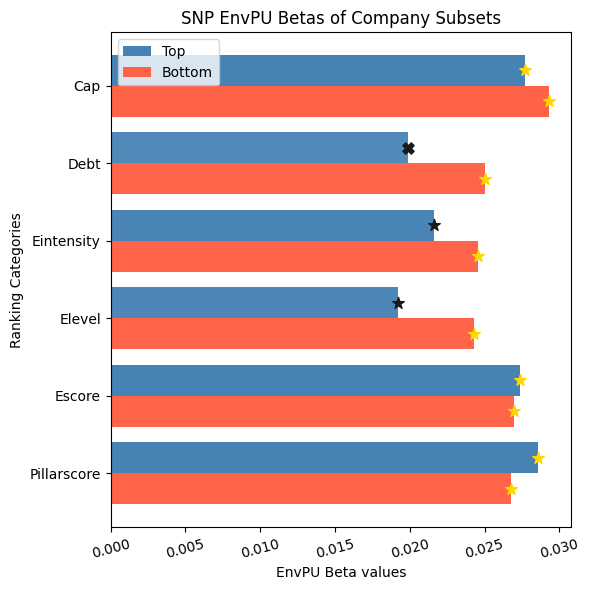

In [122]:
hor_res = reg_res.T.copy()
hor_res.columns = reg_res.T.iloc[0, :].values.tolist()
#drop string rows in hor res 
hor_res.drop_duplicates(inplace=True)
hor_res = hor_res.iloc[1:, :]
hor_res.to_csv(f"SNP_top_bottomSTARS_{policy}_DATA.csv")
#SHOW CATEGORY AVERAGE FOR EACH RANKING, time series plot of dynamic average
sns.reset_orig()
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_title(f"SNP {policy} Betas of Company Subsets", fontsize = 12)
p_values = hor_res.iloc[1::2]
color_top = p_values[f"SNP_top"].apply(lambda pvl: tuple(list(mcolors.to_rgba("steelblue"))[:3] + [1-pvl])).values.tolist()
color_bottom = p_values[f"SNP_bottom"].apply(lambda pvl: tuple(list(mcolors.to_rgba("tomato"))[:3] + [1-pvl])).values.tolist()
policy_betas = hor_res.iloc[::2]
ax.barh(y=np.array(range(len(close_categories)))-0.2, width=policy_betas["SNP_top"],
            height=0.4, label = "Top", color = color_top)
ax.barh(y=np.array(range(len(close_categories)))+0.2, width=policy_betas["SNP_bottom"],
            height=0.4, label = "Bottom", color = color_bottom)


for ct_idx, ct in enumerate(color_top):
    if (ct[3] >= 0.8 and ct[3] < 0.9):
        ax.scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="x", s = 55, color = "k")
    if (ct[3] >= 0.9 and ct[3] < 0.95):
        ax.scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="X", s = 65, color = "k")
    if (ct[3] >= 0.95 and ct[3] < 0.99):
        ax.scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="*", s = 75, color = "k")
    if (ct[3] >= 0.99):
        ax.scatter(policy_betas.iloc[ct_idx, 0], ct_idx-0.2, marker="*", s = 75, color = "gold")
for cb_idx, cb in enumerate(color_bottom):
    if (cb[3] >= 0.8 and cb[3] < 0.9):
        ax.scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="x", s = 55, color = "k")
    if (cb[3] >= 0.9 and cb[3] < 0.95):
        ax.scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="X", s = 65, color = "k")
    if (cb[3] >= 0.95 and cb[3] < 0.99):
        ax.scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="*", s = 75, color = "k")
    if (cb[3] >= 0.99):
        ax.scatter(policy_betas.iloc[cb_idx, 1], cb_idx+0.2, marker="*", s = 75, color = "gold")

ax.set_yticks(np.array(range(len(close_categories))))
ax.set_yticklabels(close_categories)
ax.invert_yaxis()
ax.set_xlabel(f"{policy} Beta values")
ax.set_ylabel(f"Ranking Categories")
for tick in ax.get_xticklabels():
    tick.set_rotation(15)
ax.legend()

plt.tight_layout()
plt.savefig(f"SNP_top_bottomSTARS_{policy}.jpg",dpi=300, bbox_inches='tight')
plt.show()

### DESCRIBE

In [43]:

close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":2}
many_return = 2
describe_stats = pd.DataFrame()
version = 1
for cdx, category in enumerate(close_categories):
     many_category = drop_requirements[category]
     df = pd.read_csv(f"data_fix/NCloseX{category}.csv")
     df= df.iloc[:112,:].copy()
     df = df.fillna("NAN")

     drop_companies = []
     drop_col = []
     n_companies = int(len(df.columns[1:].copy())/2) + 1

     #return drop
     for col in df.columns[1:n_companies]:
          if successive(df[col], many_return):
               drop_companies.append(df.loc[0, col])
     #category drop
     for col in df.columns[n_companies:]:
          if successive(df[col], many_category):
               drop_companies.append(df.loc[0, col])

     drop_companies = list(set(drop_companies))
     for col in df.columns[1:]:
          if df.loc[0, col] in drop_companies:
               drop_col.append(col)
     df_clean = df.drop(drop_col, axis = 1)
     df_clean

     print("Dropped companies with consecutive nans")

     df_clean = df_clean.replace("NAN", np.nan)
     if (version == 1):
          df_clean.iloc[1,:] =  df_clean.iloc[1,:].fillna(method = "ffill")
     if (version == 2):
          print("yes")
          df_clean.iloc[1,:] =  df_clean.iloc[1,:].fillna(method = "ffill", limit = 100)
          df_clean.iloc[1,:] =  df_clean.iloc[1,:].fillna(method = "bfill", limit = 100)
     ds = df_clean.copy()
     data_mean = pd.DataFrame(df_clean.iloc[1:, 0].values.tolist(), columns = ["date"])

     companies = ds.loc[0, :].values.tolist()
     ds.columns = companies
     ds = ds[1:].reset_index(drop = True)
     
     idx_cat = int(len(companies)/2)
     ds_cat = ds.iloc[:, idx_cat+1:].copy().applymap(lambda num: float(num))
     ds_return = ds.iloc[:, 1:idx_cat+1].copy().applymap(lambda num: float(num))
     return_second_average = pd.DataFrame(ds_return.stack().values.tolist())
     category_second_average = pd.DataFrame(ds_cat.stack().values.tolist())
     if category == "Cap":
          describe_stats["company_return"] = return_second_average.describe()
     describe_stats[f"{category}"] = category_second_average.describe()
     


Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans
Dropped companies with consecutive nans


In [40]:
describe_stats

,company_return,Cap,Debt,Eintensity,Elevel,Escore,Pillarscore
count,45399.000000,4.539900e+04,41904.000000,22170.000000,2.211500e+04,42014.000000,41016.000000
mean,1.174384,3.688571e+10,41.991612,578.913203,8.305435e+06,48.399681,47.660135
std,5.947885,6.695228e+10,70.823974,1528.385105,2.101407e+07,33.429764,27.961287
min,-44.278323,2.409082e+08,0.000000,-0.549421,-5.494208e-01,0.000000,0.000000
25%,-2.111594,8.073543e+09,12.193648,18.283927,2.102880e+05,14.552239,23.586830
50%,1.312993,1.539907e+10,23.033893,49.935598,9.438850e+05,52.857143,51.739144
75%,4.518799,3.418093e+10,47.389041,261.981815,5.030000e+06,78.017241,71.231884
max,59.476885,1.070000e+12,1277.870322,11444.505540,1.596000e+08,99.739583,98.545806


In [44]:
describe_stats.to_csv("descriptive_stats3.csv")